In [134]:
import scipy.stats as stats
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [135]:
data = pd.read_csv('./data/BPAT/BPAT_direct_emissions.csv')

# Convert to DataFrame
df = pd.DataFrame(data)

# 1. Define X (time) and y (measure)
X = df['carbon_intensity'].values[:24].reshape(-1, 1)  # Time is the feature
y = df['carbon_intensity'].values[24:48].reshape(-1, 1)  # Measure is the target

print('X:', X)
print('y:', y)

# 2. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X, y)

# 3. Predict the values based on the model
y_pred = model.predict(X)

# 4. Evaluate the model
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = mean_absolute_percentage_error(y, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

X: [[39.34]
 [38.05]
 [37.65]
 [37.36]
 [39.36]
 [41.36]
 [41.91]
 [32.65]
 [32.8 ]
 [31.12]
 [31.47]
 [32.74]
 [41.29]
 [47.45]
 [47.89]
 [44.4 ]
 [43.67]
 [42.68]
 [42.97]
 [41.71]
 [41.74]
 [41.93]
 [42.33]
 [42.5 ]]
y: [[41.63]
 [38.99]
 [37.53]
 [38.81]
 [40.43]
 [41.96]
 [42.22]
 [44.47]
 [46.72]
 [49.58]
 [48.43]
 [48.37]
 [48.18]
 [47.51]
 [44.96]
 [41.22]
 [40.18]
 [39.38]
 [40.31]
 [41.06]
 [42.32]
 [43.3 ]
 [45.13]
 [45.04]]
RMSE: 3.2688566426802863
MAPE: 0.0642456729762063


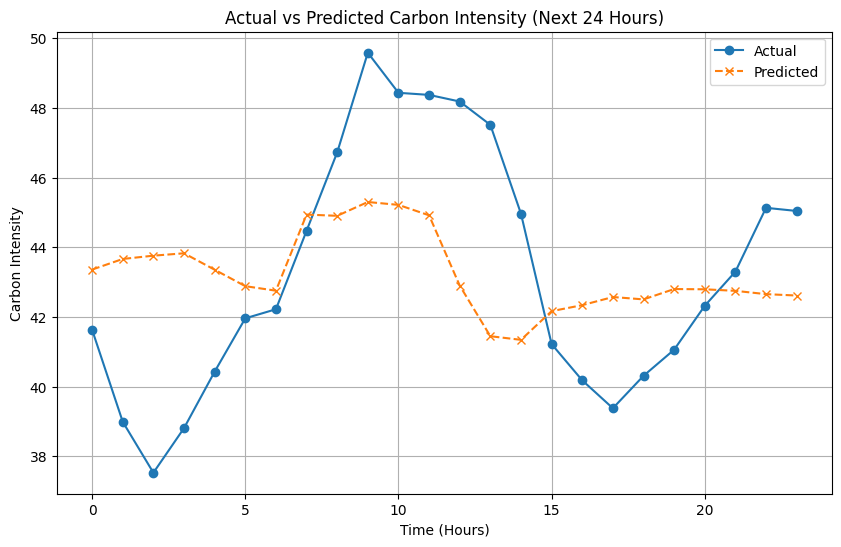

In [136]:
# 5. Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values (Next 24 hours)
plt.plot(range(24), y, label="Actual", marker='o')

# Plot predicted values (Based on first 24 hours)
plt.plot(range(24), y_pred, label="Predicted", linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time (Hours)')
plt.ylabel('Carbon Intensity')
plt.title('Actual vs Predicted Carbon Intensity (Next 24 Hours)')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Now trying the model on the year 2020.

In [137]:
# 1. Get the total number of rows
n_rows = 8783

# Split point at half
split_point = n_rows // 2  # Half of the dataset for training

# 2. Define X (first half of data) and y (second half of data)
X = df['carbon_intensity'].values[:split_point].reshape(-1, 1)  # First half as input
y = df['carbon_intensity'].values[split_point:n_rows]  # Second half as output

print(f"X: {X.shape}")
print(f"y: {y.shape}")
# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X, y[:len(X)])  # Train using the first half of the dataset

# 4. Predict the values for the test set (second half)
y_pred = model.predict(X)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y[:len(y_pred)], y_pred))
mape = mean_absolute_percentage_error(y[:len(y_pred)], y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

X: (4391, 1)
y: (4392,)
RMSE: 13.493665240039197
MAPE: 0.5780591602741277


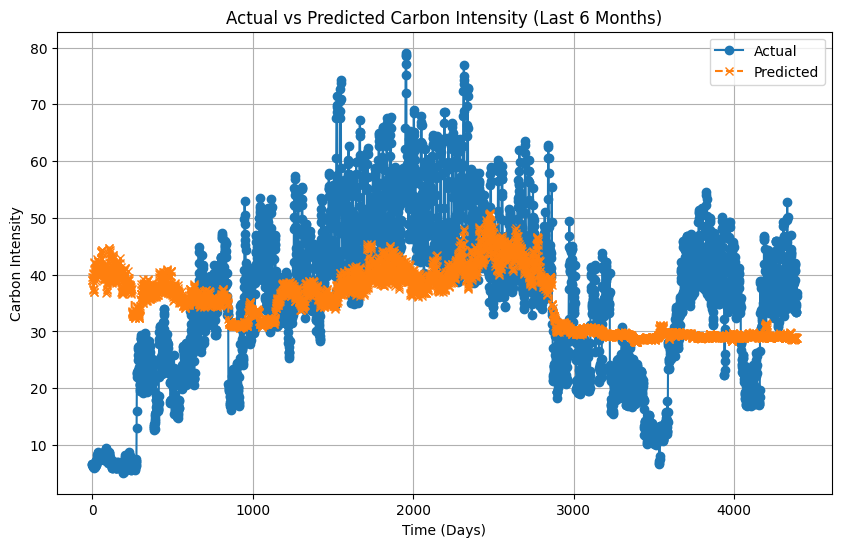

In [138]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values (Second half)
plt.plot(range(len(y[:len(y_pred)])), y[:len(y_pred)], label="Actual", marker='o')

# Plot predicted values (Based on first half)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time (Days)')
plt.ylabel('Carbon Intensity')
plt.title('Actual vs Predicted Carbon Intensity (Last 6 Months)')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Now running the model on the entire dataset, we get the following results

In [139]:
# 1. Get the total number of rows
n_rows = 17543

# Split point at half
split_point = n_rows // 2  # Half of the dataset for training

# 2. Define X (first half of data) and y (second half of data)
X = df['carbon_intensity'].values[:split_point].reshape(-1, 1)  # First half as input
y = df['carbon_intensity'].values[split_point:]  # Second half as output

print(f"X: {X.shape}")
print(f"y: {y.shape}")
# 3. Train the model (Linear Regression)
model = LinearRegression()
model.fit(X, y[:len(X)])  # Train using the first half of the dataset

# 4. Predict the values for the test set (second half)
y_pred = model.predict(X)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y[:len(y_pred)], y_pred))
mape = mean_absolute_percentage_error(y[:len(y_pred)], y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

X: (8771, 1)
y: (8773,)
RMSE: 13.337298383848436
MAPE: 0.34577087704692894


In [ ]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values (Second half)
plt.plot(range(len(y[:len(y_pred)])), y[:len(y_pred)], label="Actual", marker='o')

# Plot predicted values (Based on first half)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time (Days)')
plt.ylabel('Carbon Intensity')
plt.title('Actual vs Predicted Carbon Intensity (Last 6 Months)')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()